In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import readNetwork as rn

#matplotlib関連
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
dir_name = '_sampleData'
net_name = 'SiouxFalls_24'

# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.'))
root = os.path.join(root, '..', dir_name, net_name)
root


'c:\\Users\\tsuba\\Documents\\master_thesis\\TNPandMS_experCode\\TNPandMS_lib\\..\\_sampleData\\SiouxFalls_24'

In [25]:
df = rn.read_node(os.path.join(root, 'netname_node.tntp'.replace('netname', net_name)))
# df


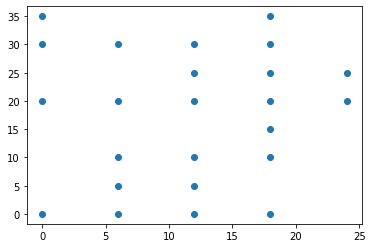

In [26]:
plt.figure()
plt.scatter(df['X'], df['Y'])

In [27]:
net = rn.read_net(os.path.join(root, 'netname_net.tntp'.replace('netname', net_name)))

In [28]:
# networkX のグラフの作り方
G = nx.DiGraph()
for i in range(net.shape[0]):
    G.add_edge(net['init_node'][i], net['term_node'][i])

# print(G.nodes)

In [29]:
# 座標リストの作成
try:
    pos = {i: [df['X'][i], df['Y'][i]] for i in df.index}  # 元データが大文字か
except KeyError:
    pos = {i: (df['x'][i], df['y'][i]) for i in df.index}  # 小文字か

# pos


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


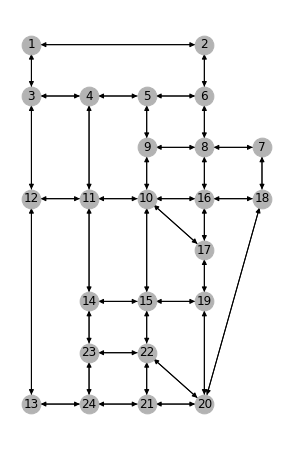

In [30]:
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure(figsize = (5, 8))
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=10, edge_color="black", node_color=(0.7, 0.7, 0.7), width=1, node_size=350, font_size=12)
plt.axis('off')
plt.show()


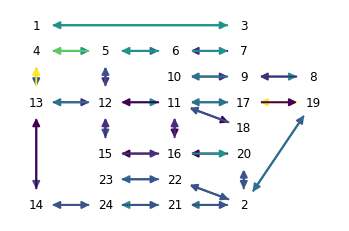

In [23]:
color = net['free_flow_time']
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure()
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=15, edge_color=color, node_color="w", width=2, node_size=1000, font_size=12)
plt.axis('off')
plt.show()
